In [176]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) # Mount google drive to load training and testing data

Mounted at /content/drive


In [185]:

PACKAGES_DIR = '/content/drive/My Drive/Bachelor/pip_cache'

TIMESERIES_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/TIMESERIES/'

# This is where all the UNCLEANED Datasets are 
DATASET_DIR = '/content/drive/MyDrive/Bachelor/DATASETS/'

# This is where CLEANED Datasets from anomilies (after careful investigation) are 
CLEANED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/CLEANED_DATASETS/'


# This is where MERGED & CLEANED Dataset is
MERGED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/MERGED_DATASET/'


# This is where MERGED & PREPROCESSED & CLEANED Dataset is
PREPROCESSED_MERGED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/PREPROCESSED_DATASET/'


# This is where the figures are saved
FIGURES_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/FIGURES/'

CONFIG_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/config.ini'


TEMPLATES_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/templates/'



  #########################################################################  PYTORCH ##########################################################

# Directory where the pytorch models will be saved 
PY_CUSTOM_CAMEL_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/camel/py/model/'

# Directory where the pytorch models will be saved 
PY_CUSTOM_CAMEL_MIX_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/camel_mix/py/model/'

# Directory where the pytorch models will be saved 
PY_CUSTOM_ALANZI_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/alanzi/py/model/'

# i change dropout rate from 
PY_CUSTOM_ALANZI2_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/alanzi2/py/model/'

# i change dropout rate from 
PY_CUSTOM_ALANZI3_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/alanzi3/py/model/'


# Directory where the pytorch models will be saved 
PY_CUSTOM_ARABERT_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/'


# Directory where the pytorch models will be saved 
PY_CUSTOM_MARBERT_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/marbert/py/model/'

# Directory where the pytorch models will be saved 

PY_ENSEMBLE_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/custom_models/ensemble/'

# Number of Figures
FIGURE_COUNTS = 1


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

# Packages

In [4]:
!pip config set global.cache-dir /content/drive/My\ Drive/Bachelor/pip_cache



!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache'--upgrade  transformers datasets calplot langdetect
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' --upgrade torchinfo sentencepiece


!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' statsmodels==0.12.1


# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' ar_wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' python-bidi
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic_reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic-reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' autokeras


from IPython.display import clear_output
clear_output() # clear output window

In [30]:
# Packages 
# types in python
from typing import List, Tuple ,Dict ,Any , Union,Optional
import time
import string
import os
import random



from collections import Counter

# -- Arabic text dependencies
# from arabic_reshaper import reshape      # pip install arabic_reshaper
# from bidi.algorithm import get_display   # pip install python-bidi
# from ar_wordcloud import ArabicWordCloud




# Data Manipulating  & Preprocessing packages
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import unicodedata # normlization of arabic letters encoding to be unicoded 
import pandas as pd
pd.set_option('display.max_colwidth', None) # Setting the display option to show the full width of columns in pandas dataframe.




# Model
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from transformers import pipeline
import torch
#from autokeras import StructuredDataClassifier



# Metrics
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve

 
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

# visualization library
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Random Seed
RANDOM_SEED=42
RANDOM_STATE=42



def set_seed(seed=42):
  RANDOM_SEED=seed
  RANDOM_STATE=seed
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False



# Set Matplotlib defaults
plt.style.use('ggplot')
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



## Reading the cleaned English data

> The Data consists of timelined Tweets that is in english , cleaned and we will remove unnecessary columns

In [6]:
df=pd.read_csv(os.path.join(CLEANED_DATASET_DIR,'english_cleaned_tweets.csv'))
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,at_who,words,tweet_len,tweet_no_words,capital_words,has_endors
0,Twitter for iPhone,Even the Radical Left Do Nothing Democrats laughed at the Fox suggestion No respect for the people running But Fox keeps on plugging to try and become politically correct They put RINO Paul Ryan on their Board They hire debate questions to Crooked Hillary,2020-04-26 21:21:02,13730.0,56260,False,1.254521e+18,['@FoxNews.'],"['Even', 'the', 'Radical', 'Left', 'Do', 'Nothing', 'Democrats', 'laughed', 'at', 'the', 'Fox', 'suggestion', 'No', 'respect', 'for', 'the', 'people', 'running', 'But', 'Fox', 'keeps', 'on', 'plugging', 'to', 'try', 'and', 'become', 'politically', 'correct', 'They', 'put', 'RINO', 'Paul', 'Ryan', 'on', 'their', 'Board', 'They', 'hire', 'debate', 'questions', 'to', 'Crooked', 'Hillary']",257,44,RINO,0
1,Twitter for iPhone,Bernie Sanders is OUT Thank you to Elizabeth Warren If not for her Bernie would have won almost every state on Super Tuesday This ended just like the Democrats amp the DNC wanted same as the Crooked Hillary fiasco The Bernie people should come to the Republican Party TRADE,2020-04-08 15:49:28,57860.0,288576,False,1.247914e+18,[],"['Bernie', 'Sanders', 'is', 'OUT', 'Thank', 'you', 'to', 'Elizabeth', 'Warren', 'If', 'not', 'for', 'her', 'Bernie', 'would', 'have', 'won', 'almost', 'every', 'state', 'on', 'Super', 'Tuesday', 'This', 'ended', 'just', 'like', 'the', 'Democrats', 'amp', 'the', 'DNC', 'wanted', 'same', 'as', 'the', 'Crooked', 'Hillary', 'fiasco', 'The', 'Bernie', 'people', 'should', 'come', 'to', 'the', 'Republican', 'Party', 'TRADE']",274,49,OUT,0
2,Twitter for iPhone,Are any Democrat operatives the DNC or Crooked Hillary Clinton blaming Russia Russia Russia for the Bernie Sanders win in Nevada If so I suggest calling Bob Mueller amp the Angry Democrats to do a new Mueller Report Democrat Edition Bob will get to the bottom of it,2020-02-23 18:45:26,28205.0,111474,False,1.231651e+18,[],"['Are', 'any', 'Democrat', 'operatives', 'the', 'DNC', 'or', 'Crooked', 'Hillary', 'Clinton', 'blaming', 'Russia', 'Russia', 'Russia', 'for', 'the', 'Bernie', 'Sanders', 'win', 'in', 'Nevada', 'If', 'so', 'I', 'suggest', 'calling', 'Bob', 'Mueller', 'amp', 'the', 'Angry', 'Democrats', 'to', 'do', 'a', 'new', 'Mueller', 'Report', 'Democrat', 'Edition', 'Bob', 'will', 'get', 'to', 'the', 'bottom', 'of', 'it']",266,48,DNC,0
3,Twitter for iPhone,They say Roger Stone lied to Congress OH I see but so did Comey and he also leaked classified information for which almost everyone other than Crooked Hillary Clinton goes to jail for a long time and so did Andy McCabe who also lied to the FBI FAIRNESS,2020-02-20 15:22:15,33184.0,114805,False,1.230513e+18,['@CNN'],"['They', 'say', 'Roger', 'Stone', 'lied', 'to', 'Congress', 'OH', 'I', 'see', 'but', 'so', 'did', 'Comey', 'and', 'he', 'also', 'leaked', 'classified', 'information', 'for', 'which', 'almost', 'everyone', 'other', 'than', 'Crooked', 'Hillary', 'Clinton', 'goes', 'to', 'jail', 'for', 'a', 'long', 'time', 'and', 'so', 'did', 'Andy', 'McCabe', 'who', 'also', 'lied', 'to', 'the', 'FBI', 'FAIRNESS']",254,48,OH,0
4,Twitter for iPhone,Whatever happened to Hillary campaign manager Podestas BROTHER Wasnt he caught forced to leave his firm with BIG BAD things to happen Why did nothing ever happen to him only to the other side,2020-02-12 02:09:26,33620.0,114823,False,1.227414e+18,[],"['Whatever', 'happened', 'to', 'Hillary', 'campaign', 'manager', 'Podestas', 'BROTHER', 'Wasnt', 'he', 'caught', 'forced', 'to', 'leave', 'his', 'firm', 'with', 'BIG', 'BAD', 'things', 'to', 'happen', 'Why', 'did', 'nothing', 'ever', 'happen', 'to', 'him', 'only', 'to', 'the', 'other', 'side']",192,34,BROTHER,0


In [7]:
columns = ['text', 'created_at']
dropped_columns = [col for col in df.columns if col not in columns] 


df.drop(dropped_columns,axis=1,inplace=True)
df.rename(columns={'text':'english_tweet','created_at':'Datetime'},inplace=True)
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)


len(df)

223

In [8]:
df.head()

,english_tweet
Datetime,
2020-04-26 21:21:02,Even the Radical Left Do Nothing Democrats laughed at the Fox suggestion No respect for the people running But Fox keeps on plugging to try and become politically correct They put RINO Paul Ryan on their Board They hire debate questions to Crooked Hillary
2020-04-08 15:49:28,Bernie Sanders is OUT Thank you to Elizabeth Warren If not for her Bernie would have won almost every state on Super Tuesday This ended just like the Democrats amp the DNC wanted same as the Crooked Hillary fiasco The Bernie people should come to the Republican Party TRADE
2020-02-23 18:45:26,Are any Democrat operatives the DNC or Crooked Hillary Clinton blaming Russia Russia Russia for the Bernie Sanders win in Nevada If so I suggest calling Bob Mueller amp the Angry Democrats to do a new Mueller Report Democrat Edition Bob will get to the bottom of it
2020-02-20 15:22:15,They say Roger Stone lied to Congress OH I see but so did Comey and he also leaked classified information for which almost everyone other than Crooked Hillary Clinton goes to jail for a long time and so did Andy McCabe who also lied to the FBI FAIRNESS
2020-02-12 02:09:26,Whatever happened to Hillary campaign manager Podestas BROTHER Wasnt he caught forced to leave his firm with BIG BAD things to happen Why did nothing ever happen to him only to the other side


### Count of tweets per day

In [9]:
tweetCounts = df.resample('1D').count()

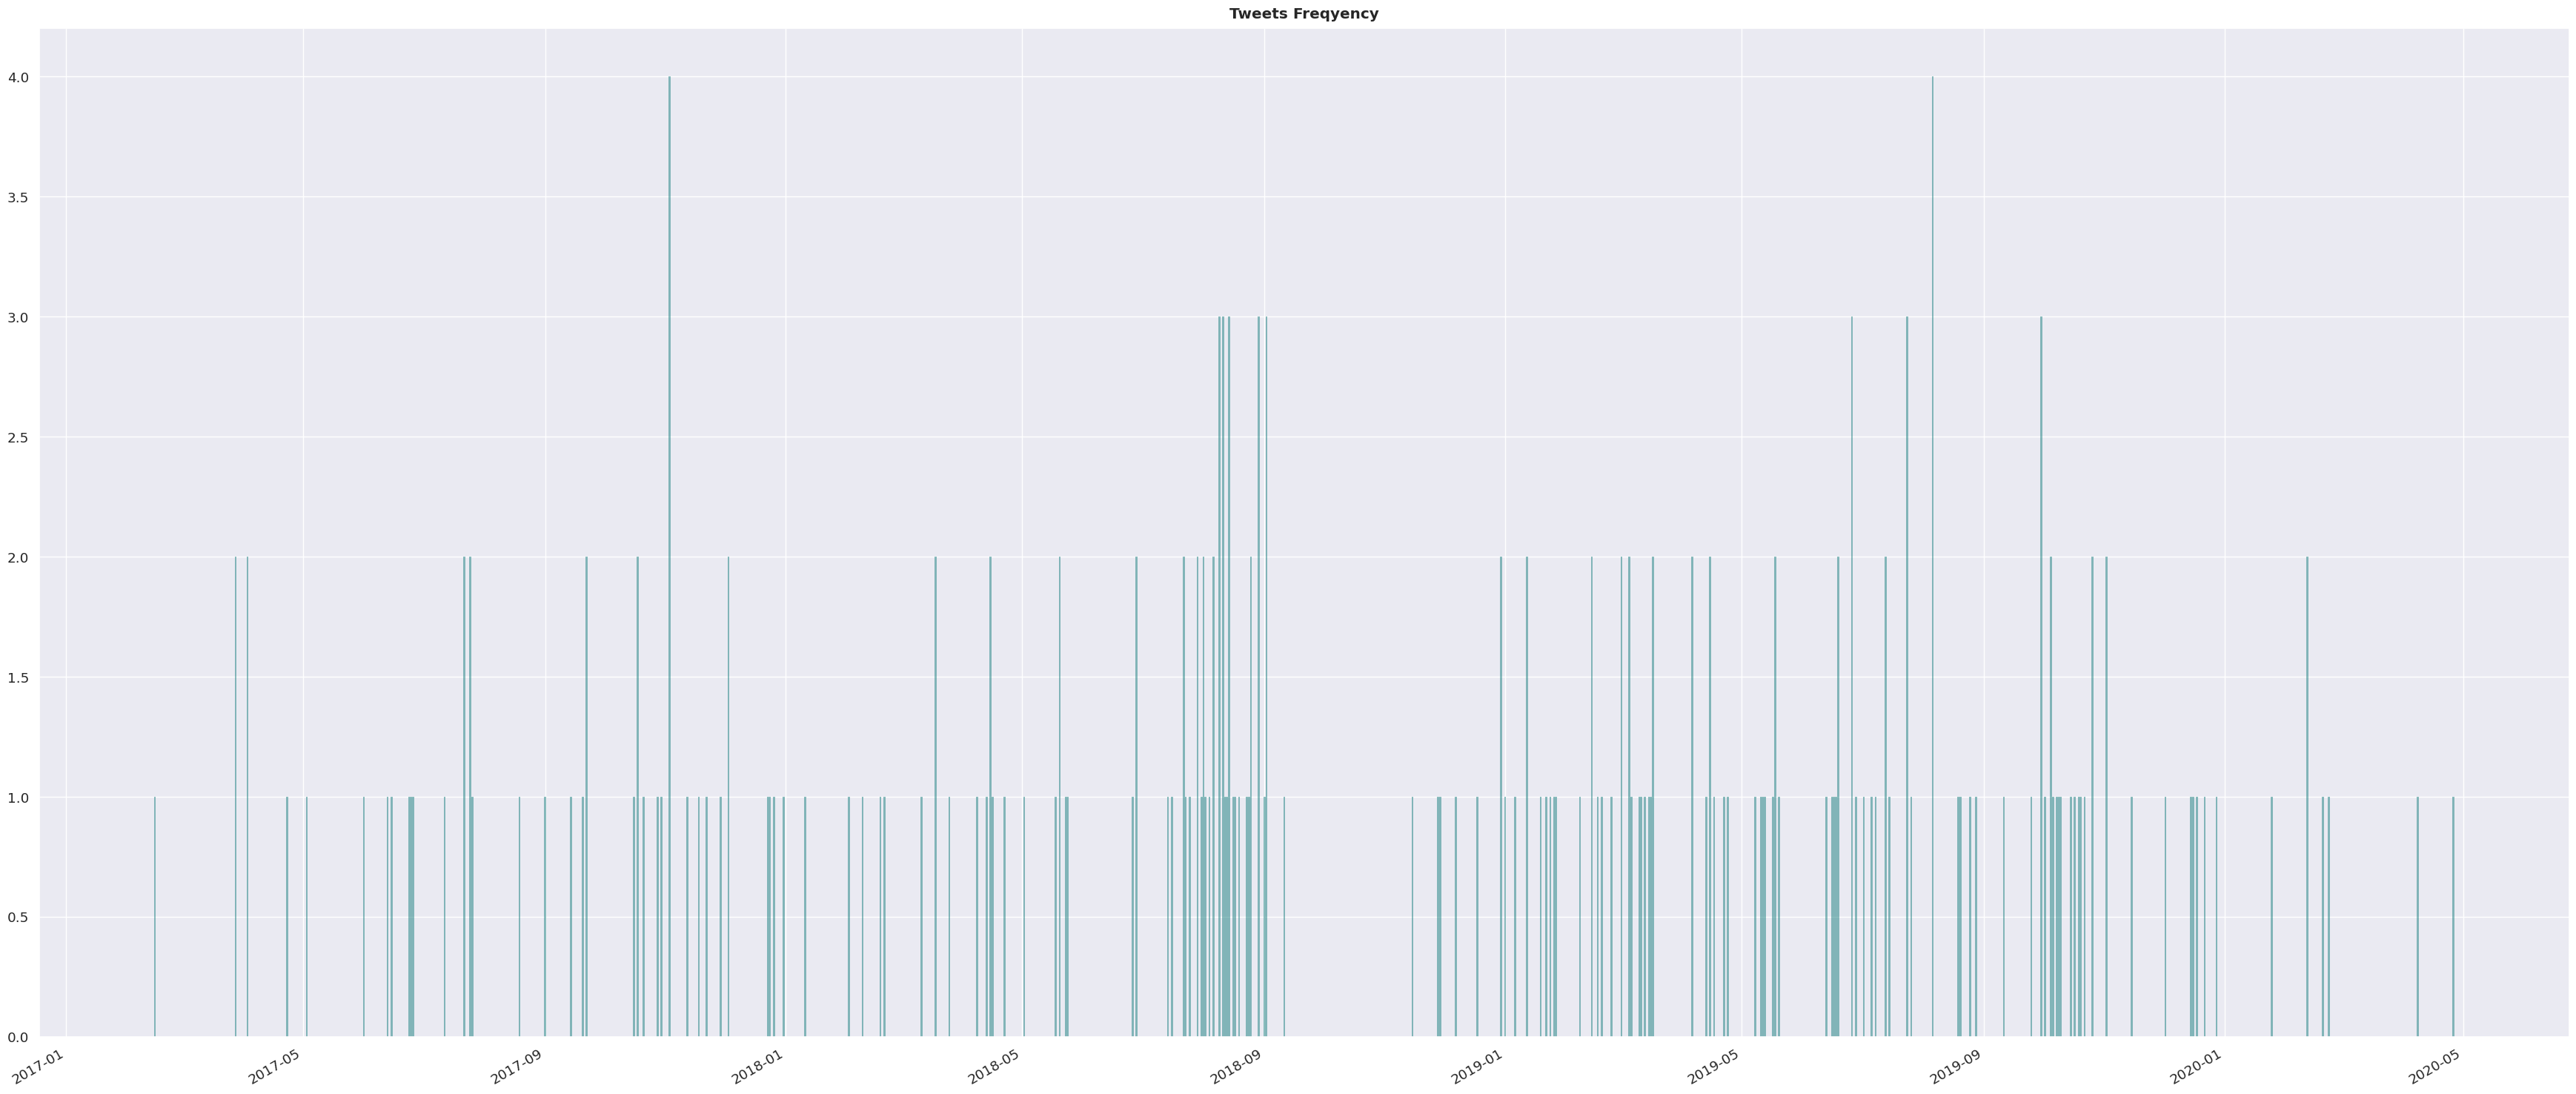

In [141]:
import seaborn as sns

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(35,15))
width = np.diff(tweetCounts.index).min()
ax.bar(tweetCounts.index, tweetCounts.english_tweet, alpha=0.5,color=(0.1,0.5,0.5),width=width,linewidth=0)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

plt.savefig(os.path.join(TIMESERIES_DATASET_DIR,'Tweets_Freqyency'),format='png')
plt.title('Tweets Freqyency')
plt.show()


### Clear Previous Sessions

In [11]:
from keras.backend import clear_session # clears the current Keras session and frees up memory.
import gc
import torch
clear_session()

# set the maximum split size to 512 MB
max_split_size_mb = 512


# Clear PyTorch cache (if using a GPU)
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

# Delete existing PyTorch models or variables

model = 'dummy'
optimizer= 'dummy'
tokenizer='dummy'
trainer='dummy'
del model, optimizer,tokenizer,trainer

# set the environment variable
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = f'max_split_size={max_split_size_mb}'


## Translating Dataset to Arabic

In [12]:
from transformers import MarianTokenizer, MarianMTModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
model_name = "Helsinki-NLP/opus-mt-en-ar"
tokenizer = MarianTokenizer.from_pretrained(model_name, device=device)
model = MarianMTModel.from_pretrained(model_name)
# Move the model to the device
model.to(device)
device

device(type='cuda')

In [13]:
#  check if your system has a compatible NVIDIA G
print(torch.cuda.is_available())

True


In [14]:
english_text = "This is an example sentence to translate."

translated = model.generate(**tokenizer(english_text, return_tensors="pt", padding=True).to(device))
arabic_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
print(arabic_text[0])

وهذا مثال على عبارة ينبغي ترجمتها.


In [15]:
def translate(tweet:str)->str:
  '''Translates an english tweet to arabic tweet'''
  # Translate the tweet
  encoded = tokenizer.encode(tweet, return_tensors='pt').to(device)
  #  move it to the CPU memory
  translated = model.generate(encoded).cpu()
  arabic_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

  return arabic_text[0]


In [16]:
def translate(tweet:str) -> str:
    '''Translates an English tweet to an Arabic tweet'''
    # Split tweet into chunks of maximum length 512
    chunks = [tweet[i:i+512] for i in range(0, len(tweet), 512)]
    # Translate each chunk and concatenate the results
    arabic_text = ''
    for chunk in chunks:
        # Translate the chunk
        encoded = tokenizer.encode(chunk, return_tensors='pt').to(device)
        translated = model.generate(encoded).cpu()
        arabic_chunk = [tokenizer.decode(t, skip_special_tokens=True) for t in translated][0]
        # Concatenate the translation to the overall result
        arabic_text += arabic_chunk
    return arabic_text


In [17]:
text ='Even the Radical Left Do Nothing Democrats laughed at the Fox suggestion No respect for the people running But Fox keeps on plugging to try and become politically correct They put RINO Paul Ryan on their Board They hire debate questions to Crooked Hillary'
print(translate(text))

حتى الراديكالي اليسار لا تفعل لا شيء الديمقراطيون ضحكوا على اقتراح فوكس لا احترام للأشخاص الذين يركضون ولكن فوكس يستمر في المماطلة في محاولة ويصبح صحيحا سياسيا وضعوا رينو بول رايان في مجلس إدارتهم


## Translate each English Tweet to Arabic Tweet

In [18]:
%%time
df['arabic_tweet'] = df['english_tweet'].map(translate)

CPU times: user 2min 43s, sys: 333 ms, total: 2min 43s
Wall time: 2min 47s


In [19]:
df.head()

,english_tweet,arabic_tweet
Datetime,,
2020-04-26 21:21:02,Even the Radical Left Do Nothing Democrats laughed at the Fox suggestion No respect for the people running But Fox keeps on plugging to try and become politically correct They put RINO Paul Ryan on their Board They hire debate questions to Crooked Hillary,حتى الراديكالي اليسار لا تفعل لا شيء الديمقراطيون ضحكوا على اقتراح فوكس لا احترام للأشخاص الذين يركضون ولكن فوكس يستمر في المماطلة في محاولة ويصبح صحيحا سياسيا وضعوا رينو بول رايان في مجلس إدارتهم
2020-04-08 15:49:28,Bernie Sanders is OUT Thank you to Elizabeth Warren If not for her Bernie would have won almost every state on Super Tuesday This ended just like the Democrats amp the DNC wanted same as the Crooked Hillary fiasco The Bernie people should come to the Republican Party TRADE,(بيرني ساندرز) هو خارج شكراً لـ (إليزابيث وارن) لولاها لكان (بيرني) فاز تقريباً بكل ولاية يوم الثلاثاء
2020-02-23 18:45:26,Are any Democrat operatives the DNC or Crooked Hillary Clinton blaming Russia Russia Russia for the Bernie Sanders win in Nevada If so I suggest calling Bob Mueller amp the Angry Democrats to do a new Mueller Report Democrat Edition Bob will get to the bottom of it,هل هناك أي ناشطين ديمقراطيين من DNC أو كروكد هيلاري كلينتون يلومون روسيا روسيا روسيا روسيا على فوز بيرني ساندرز في نيفادا إذا كان كذلك أقترح دعوة بوب مولر ام ام ام ام ام امبير الديمقراطيين الغاضبين
2020-02-20 15:22:15,They say Roger Stone lied to Congress OH I see but so did Comey and he also leaked classified information for which almost everyone other than Crooked Hillary Clinton goes to jail for a long time and so did Andy McCabe who also lied to the FBI FAIRNESS,يقولون أنّ (روجر ستون) كذب على الكونغرس، أرى ذلك، لكنّ (كومي) أيضاً سرّب معلومات سريّة
2020-02-12 02:09:26,Whatever happened to Hillary campaign manager Podestas BROTHER Wasnt he caught forced to leave his firm with BIG BAD things to happen Why did nothing ever happen to him only to the other side,أياً كان ما حدث لمدير حملة (هيلاري) (بوديستاس) و (واست) الأخ الأخ (أُمِس وأُجبِرَ على ترك شركته مع أشياء (بي بي بي إي)


## Ensemble Method

In [20]:
import torch
from transformers import AutoTokenizer
from tqdm.auto import tqdm as ProgressBar

def preprocessing_for_bert(tokenizer: AutoTokenizer,
                           data: np.array , 
                           text_preprocessing_fn) -> Tuple[torch.Tensor, torch.Tensor]:
    """Perform required preprocessing steps for pretrained BERT.
    @param    tokenizer (AutoTokenizer): Instance of BERT tokenizer.
    @param    data (np.array): Array of texts to be processed.
    @param    model_name (str): Name of BERT model used for tokenization.
    @param    text_preprocessing_fn: Function to preprocess text data.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
   """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []
    
    
    # Progress bar for tracking progress
    progress_bar = ProgressBar(range(len(data)))

    # For every sentence...
    for i, sentence in enumerate(data):
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text= sentence,  #text_preprocessing_fn(sentence),  # Preprocess sentence
            add_special_tokens = True,        # Add `[CLS]` and `[SEP]`
            max_length = MAX_LEN,             # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask = True,     # Return attention mask
            truncation=True,
        ) 
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
        progress_bar.update(1)
        
    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks   

In [101]:
import torch
from torch import nn
from typing import List,Tuple
from transformers import BertTokenizer
import torch
from typing import List, Tuple
from transformers import BertTokenizer
MAX_LEN = 180

def predict_sentiment(models: List[nn.Module], text: str, tokenizer: BertTokenizer, save_dir:str, device) -> Tuple[str,torch.Tensor]:

    input_ids, attention_masks = preprocessing_for_bert(tokenizer, [text], text_preprocessing_fn=None)
    # Put the models into evaluation mode. The dropout layers are disabled during the test time.
    class_names = ['positive', 'negative', 'neutral']

    for model in models:
        model.eval()
        model.to(device)  # Load model onto the specified device
    
    df_path = os.path.join(save_dir, "Models'_Accuracies.csv")
    if os.path.exists(df_path):
        df = pd.read_csv(df_path)
        contribution_percentages = df['contribution_percentage'].tolist()
        accuracies = df['accuracy'].tolist()
    else:
      print("Models'_Accuracies.csv is needed !!!")

    all_logits = []

    for i, model in enumerate(models):
        with torch.no_grad():
            logits = model(input_ids.to(device), attention_mask=attention_masks.to(device))[0]  # Assuming the model takes input_ids and attention_mask as input
        all_logits.append(contribution_percentages[i] * logits)  # Weighted contribution of each model's logits

    # Aggregate the logits from all models
    aggregated_logits = torch.stack(all_logits).sum(dim=0)

    # Convert logits to predicted sentiment
    predicted_sentiment = torch.argmax(aggregated_logits)
    tensorprobs = torch.softmax(aggregated_logits, dim=0)  # Apply softmax to obtain probability distribution
    tensorprobs = torch.clamp(tensorprobs, min=1e-6, max=1.0 - 1e-6)  # clip the values of the probabilities

    tensorlabels = torch.max(tensorprobs, dim=0)

    # label = tensorlabels[1].cpu().numpy()
    score = tensorlabels[0].cpu().numpy()

    # Map the predicted sentiment index to corresponding sentiment label
    predicted_sentiment_label = class_names[predicted_sentiment]


    return predicted_sentiment_label, score




In [298]:
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

classes= ['positive', 'negative', 'neutral']


ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
}

In [33]:
from transformers import AutoModel , AutoConfig

class BertClassifier(nn.Module):
    """
    BERT-based classifier model for binary classification
    """
    def __init__(self, model_name: str,
                 freeze_bert: bool = False,
                 hidden_size: int = 256,
                 num_hidden_layers: int = 2,
                 dropout_prob: Optional[float] = None ,
                 label2id: Optional[Dict[str,int]] = SENTIMENT_TO_ID,
                 id2label: Optional[Dict[int,str]] = ID_TO_SENTIMENT,
                 ):
        """
        @param    model_name (str): Name of the pre-trained BERT model to use.
        @param    freeze_bert (bool): Set to `True` to freeze BERT layers.
        @param    hidden_size (int): Number of hidden units in the classifier layer.
        @param    num_hidden_layers (int): Number of hidden layers in the classifier.
        @param    dropout_prob (Optional[float]): Dropout probability for the classifier layer.
        """
        super(BertClassifier, self).__init__()
        self.model_name = model_name
        # Load the configuration
        self.load_config(model_name,label2id = label2id ,id2label = id2label )
        # Instantiate BERT model
        self.bert = AutoModel.from_pretrained(model_name , config = self.config)
        
        # Freeze BERT layers (from updating the weights parameters )if specified
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
        # Define classifier layer
        layers = []
        # holds the number of hidden units in each layer of the BERT model to make it input to the coming layers.
        in_features = self.bert.config.hidden_size
        
        for i in range(num_hidden_layers):
            #  linear transformation to the input tensor
            linear_layer = nn.Linear(in_features, hidden_size)
            
            # initialize weights to keep the variance of the activations and gradients roughly the same across different layers,
            # which can help prevent vanishing or exploding gradients during training
            nn.init.xavier_uniform_(linear_layer.weight)
            
            # Naming the parameters
            # linear_layer.weight.names = ('in_features', 'out_features')
            # linear_layer.bias.names = ('out_features',)

            layers.append(linear_layer)

            #  non-linearity into the model
            if i % 5 == 0:
              layers.append(nn.LeakyReLU())
            elif i % 5 == 1: 
              layers.append(nn.GELU())
            elif i % 5 == 2:
              layers.append(nn.ELU()) 
            elif i % 5 == 3:
              layers.append(nn.Softmax())

            layers.append(nn.LayerNorm(hidden_size))
            if  i% 2 == 0 and dropout_prob is not None:
              # reduces the risk of over-reliance on specific features that may not generalize well
              # randomly sets a fraction of its input units to 0 during each training epoch
                layers.append(nn.Dropout(dropout_prob))

                dropout_prob = dropout_prob * 2

            # in features : 0=>bert 1=>256 2=>128 3=>64 
            in_features = hidden_size
            # hidden sizes : 0=>256 1=>128 2=>64 3=>32 
            hidden_size = hidden_size // 2
        

        # we have 3 classes 
        # in features :  3=>64 
        num_classes = len(label2id) # = 3
        layers.append(nn.Linear(in_features, num_classes))
        self.classifier = nn.Sequential(*layers)
    def load_config(self, model_name:str , id2label : Dict[int,str],label2id : Dict[str,int]):
      self.config = AutoConfig.from_pretrained(model_name, num_labels = 3)
      self.config.id2label = id2label
      self.config.label2id = label2id


    def forward(self, input_ids: torch.Tensor, attention_mask: torch.Tensor) -> torch.Tensor:
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        # outputs[0] = (batch_size, sequence_length, hidden_size)
        # [:, 0, :] = selects all elements along the first dimension (batch size), the first element along the second dimension (which corresponds to the CLS token in BERT), and all elements along the third dimension (hidden size)
        # final shape = (batch_size, hidden_size)
        # [CLS] token is usually used to represent the entire input sequence and used for classification tasks
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits


In [39]:
from typing import Optional , Dict
import torch
import torch.nn as nn
from transformers import AutoModel , AutoConfig

import pickle

def load_model_from_checkpoint(model:nn.Module,save_dir:Optional[str] = None,checkpoint:Optional[str]= None):
      """
      load model from specific checkpoint
      """
      if save_dir is not None and checkpoint is not None:
        checkpoint_path = os.path.join(save_dir,checkpoint)
        print(f'Loading model from this checkpoint {checkpoint_path}')
  
        checkpoint = torch.load(checkpoint_path,map_location=device)
        model.load_state_dict(checkpoint)

        print(f'loaded checkpoint of {model.model_name} successfully')
      return model


In [41]:
def initialize_model(save_dir:str,model_name: str) -> Tuple[BertClassifier,torch.device]:
    """
    Initialize the Bert Classifier, the optimizer and the learning rate scheduler.

    Args:
        model_name (str): model checkpoint from huggingface

    Returns:
        Tuple[BertClassifier, AdamW, get_linear_schedule_with_warmup]: A tuple containing the BertClassifier object,
        the AdamW optimizer object, and the learning rate scheduler object.
    """
    # Instantiate Bert Classifier
    model = BertClassifier(model_name,freeze_bert=False, dropout_prob = 0.25)
    # Tell PyTorch to run the model on GPU
    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs")
        # for parallelizing the training of a neural network across multiple GPUs
        model = torch.nn.DataParallel(model)
    # If there's a GPU available...
    if torch.cuda.is_available():    

        # Tell PyTorch to use the GPU.    
        device = torch.device("cuda")

        print('There are %d GPU(s) available.' % torch.cuda.device_count())

        print('We will use the GPU:', torch.cuda.get_device_name(0))
        !nvidia-smi

    # If not...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")
    model.to(device)
    return model , device


In [42]:
CAMEL_DA_model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment'
ARABERT_model_huggingface_checkpoint='aubmindlab/bert-base-arabert'
MARBERT_model_huggingface_checkpoint='Ammar-alhaj-ali/arabic-MARBERT-sentiment'
CAMEL_MIX_model_huggingface_checkpoint='CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment'
ALANZI_model_huggingface_checkpoint='ALANZI/imamu_arabic_sentimentAnalysis'


#### CAMEL-BERT-MIX Subword Tokenization

In [23]:
tokenizer = AutoTokenizer.from_pretrained(CAMEL_MIX_model_huggingface_checkpoint)

### Models

In [43]:
set_seed(RANDOM_STATE) 
CAMEL_MIX_model,device = initialize_model(save_dir = PY_CUSTOM_CAMEL_MIX_MODEL_DIR,model_name = CAMEL_MIX_model_huggingface_checkpoint )
CAMEL_DA_model , _ = initialize_model(save_dir = PY_CUSTOM_CAMEL_MODEL_DIR,model_name = CAMEL_DA_model_huggingface_checkpoint )
MARBERT_model ,_ =initialize_model(save_dir = PY_CUSTOM_MARBERT_MODEL_DIR,model_name = MARBERT_model_huggingface_checkpoint )
ARABERT_model ,_= initialize_model(save_dir = PY_CUSTOM_ARABERT_MODEL_DIR,model_name = ARABERT_model_huggingface_checkpoint )
ALANZI_model ,_=initialize_model(save_dir = PY_CUSTOM_ALANZI_MODEL_DIR,model_name = ALANZI_model_huggingface_checkpoint )

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sun Apr 30 18:02:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |   2063MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sun Apr 30 18:02:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |   2511MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

Some weights of the model checkpoint at Ammar-alhaj-ali/arabic-MARBERT-sentiment were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sun Apr 30 18:03:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |   2959MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

Some weights of the model checkpoint at aubmindlab/bert-base-arabert were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sun Apr 30 18:03:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    32W /  70W |   3613MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

Some weights of the model checkpoint at ALANZI/imamu_arabic_sentimentAnalysis were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sun Apr 30 18:03:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    32W /  70W |   4161MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

In [44]:
best_model_path = "best_model.pth"
CAMEL_MIX_model = load_model_from_checkpoint(CAMEL_MIX_model,save_dir = PY_CUSTOM_CAMEL_MIX_MODEL_DIR,checkpoint=best_model_path)
CAMEL_DA_model =  load_model_from_checkpoint(CAMEL_DA_model,save_dir = PY_CUSTOM_CAMEL_MODEL_DIR,checkpoint=best_model_path)
MARBERT_model =load_model_from_checkpoint(MARBERT_model,save_dir = PY_CUSTOM_MARBERT_MODEL_DIR,checkpoint=best_model_path)
ARABERT_model = load_model_from_checkpoint(ARABERT_model,save_dir = PY_CUSTOM_ARABERT_MODEL_DIR,checkpoint=best_model_path)
ALANZI_model = load_model_from_checkpoint(ALANZI_model,save_dir = PY_CUSTOM_ALANZI_MODEL_DIR,checkpoint=best_model_path)


Loading model from this checkpoint /content/drive/MyDrive/Bachelor/Sentiment/custom_models/camel_mix/py/model/best_model.pth
loaded checkpoint of CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment successfully
Loading model from this checkpoint /content/drive/MyDrive/Bachelor/Sentiment/custom_models/camel/py/model/best_model.pth
loaded checkpoint of CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment successfully
Loading model from this checkpoint /content/drive/MyDrive/Bachelor/Sentiment/custom_models/marbert/py/model/best_model.pth
loaded checkpoint of Ammar-alhaj-ali/arabic-MARBERT-sentiment successfully
Loading model from this checkpoint /content/drive/MyDrive/Bachelor/Sentiment/custom_models/arabert/py/model/best_model.pth
loaded checkpoint of aubmindlab/bert-base-arabert successfully
Loading model from this checkpoint /content/drive/MyDrive/Bachelor/Sentiment/custom_models/alanzi/py/model/best_model.pth
loaded checkpoint of ALANZI/imamu_arabic_sentimentAnalysis successfully


#### Evaluating

In [49]:
ensemble_models = [CAMEL_MIX_model,ARABERT_model,CAMEL_DA_model,MARBERT_model,ALANZI_model]


In [85]:

#@title Write your tweet... { run: "auto", vertical-output: true, form-width: "70%", display-mode: "form" }
my_input = "اليوم بروح اكل  وحش" #@param {type:"raw"}
predict_sentiment(ensemble_models, my_input, tokenizer, PY_ENSEMBLE_MODEL_DIR, device)

  0%|          | 0/1 [00:00<?, ?it/s]

successfully loaded accuracies
[tensor([  5.0324,  22.8190, -11.5985], device='cuda:0'), tensor([ -7.1776, -24.8622,  30.8390], device='cuda:0'), tensor([-33.8491,  33.0290, -15.5734], device='cuda:0'), tensor([ 3.3016, -8.3895,  9.2708], device='cuda:0'), tensor([-25.6596,  48.2077,  -1.4372], device='cuda:0')]
tensor([-58.3522,  70.8041,  11.5006], device='cuda:0')
tensor([1.0000e-06, 1.0000e+00, 1.0000e-06], device='cuda:0')


('negative', array(0.999999, dtype=float32))

In [103]:
df[['label', 'score']] = df['arabic_tweet'].apply(lambda tweet: pd.Series(predict_sentiment(ensemble_models, tweet, tokenizer, PY_ENSEMBLE_MODEL_DIR, device)))


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [104]:
df.head()

,english_tweet,arabic_tweet,label,score
Datetime,,,,
2020-04-26 21:21:02,Even the Radical Left Do Nothing Democrats laughed at the Fox suggestion No respect for the people running But Fox keeps on plugging to try and become politically correct They put RINO Paul Ryan on their Board They hire debate questions to Crooked Hillary,حتى الراديكالي اليسار لا تفعل لا شيء الديمقراطيون ضحكوا على اقتراح فوكس لا احترام للأشخاص الذين يركضون ولكن فوكس يستمر في المماطلة في محاولة ويصبح صحيحا سياسيا وضعوا رينو بول رايان في مجلس إدارتهم,negative,0.999999
2020-04-08 15:49:28,Bernie Sanders is OUT Thank you to Elizabeth Warren If not for her Bernie would have won almost every state on Super Tuesday This ended just like the Democrats amp the DNC wanted same as the Crooked Hillary fiasco The Bernie people should come to the Republican Party TRADE,(بيرني ساندرز) هو خارج شكراً لـ (إليزابيث وارن) لولاها لكان (بيرني) فاز تقريباً بكل ولاية يوم الثلاثاء,neutral,0.999999
2020-02-23 18:45:26,Are any Democrat operatives the DNC or Crooked Hillary Clinton blaming Russia Russia Russia for the Bernie Sanders win in Nevada If so I suggest calling Bob Mueller amp the Angry Democrats to do a new Mueller Report Democrat Edition Bob will get to the bottom of it,هل هناك أي ناشطين ديمقراطيين من DNC أو كروكد هيلاري كلينتون يلومون روسيا روسيا روسيا روسيا على فوز بيرني ساندرز في نيفادا إذا كان كذلك أقترح دعوة بوب مولر ام ام ام ام ام امبير الديمقراطيين الغاضبين,neutral,0.999999
2020-02-20 15:22:15,They say Roger Stone lied to Congress OH I see but so did Comey and he also leaked classified information for which almost everyone other than Crooked Hillary Clinton goes to jail for a long time and so did Andy McCabe who also lied to the FBI FAIRNESS,يقولون أنّ (روجر ستون) كذب على الكونغرس، أرى ذلك، لكنّ (كومي) أيضاً سرّب معلومات سريّة,neutral,0.999999
2020-02-12 02:09:26,Whatever happened to Hillary campaign manager Podestas BROTHER Wasnt he caught forced to leave his firm with BIG BAD things to happen Why did nothing ever happen to him only to the other side,أياً كان ما حدث لمدير حملة (هيلاري) (بوديستاس) و (واست) الأخ الأخ (أُمِس وأُجبِرَ على ترك شركته مع أشياء (بي بي بي إي),neutral,0.999999


In [91]:
df['label'].describe()

count         223
unique          3
top       neutral
freq          167
Name: label, dtype: object

## Scaling Sentiment score probabilities
```
-1 * negative score
0 * positive score
1 * neutral score



```

In [133]:
import matplotlib.pyplot as plt

def split_labels(df): 

  pos = df[df['label'] == 'positive']
  neg = df[df['label'] == 'negative']
  neu = df[df['label'] == 'neutral']

  return neg,neu,pos

def normalizeScores(df:pd.DataFrame):

  negative,neutral,positive = split_labels(df)
  
  positive['score_norm'] = positive.score 
  neutral['score_norm'] = 0.0  
  negative['score_norm'] = -1*(negative.score)  
  appended = positive.append(neutral,ignore_index=False).append(negative,ignore_index = False)
  appended.sort_index()


  return appended

## Sentiment on time Series

In [156]:
df[df['label'] != 'neutral'].label.value_counts()

negative    50
positive     6
Name: label, dtype: int64

In [109]:
df.label.astype('category').cat.codes

Datetime
2020-04-26 21:21:02    0
2020-04-08 15:49:28    1
2020-02-23 18:45:26    1
2020-02-20 15:22:15    1
2020-02-12 02:09:26    1
                      ..
2017-04-03 11:21:11    1
2017-04-03 11:16:52    1
2017-03-28 01:35:35    1
2017-03-28 01:26:04    1
2017-02-15 12:08:12    0
Length: 223, dtype: int8

In [117]:
df['score']

Datetime
2020-04-26 21:21:02    0.999999
2020-04-08 15:49:28    0.999999
2020-02-23 18:45:26    0.999999
2020-02-20 15:22:15    0.999999
2020-02-12 02:09:26    0.999999
                         ...   
2017-04-03 11:21:11    0.999999
2017-04-03 11:16:52    0.999999
2017-03-28 01:35:35    0.999999
2017-03-28 01:26:04    0.999999
2017-02-15 12:08:12    0.999999
Name: score, Length: 223, dtype: object

In [157]:
import seaborn as sns
from matplotlib import rcParams
appended = normalizeScores(df)
appended


,english_tweet,arabic_tweet,label,score,score_norm
Datetime,,,,,
2019-11-02 16:26:02,A great new book by Howie Carr What Really Happened How Donald J Trump Saved America From Hillary Clinton is on sale now Howie is a talented New England force who was there at the very beginning,كتاب جديد عظيم كتبه هاوي كار ما الذي حدث حقاً كيف دونالد ج. ترامب أنقذ أمريكا من هيلاري كلينتون تم بيعه الآن هاوي قوة موهوبة من نيو انجلترا التي كانت هناك في البداية,positive,0.999999,0.999999
2018-08-04 03:01:46,Congratulations to Gregg Jarrett on his book THE RUSSIA HOAX THE ILLICIT SCHEME TO CLEAR HILLARY CLINTON AND FRAME DONALD TRUMP going to on and Amazon It is indeed a HOAX and WITCH HUNT illegally started by people who have already been disgraced Great book,تهانينا لـ (غريغ جاريت) على كتابه (الروسية هوس) (الاسم غير المشروع) (لترجمة (كلينتون) و (الروح الغامرة,positive,0.999999,0.999999
2018-08-02 04:38:15,Congratulations to on The TREMENDOUS success of his just out book The Russia Hoax The Illicit Scheme To Clear Hillary Clinton amp Frame Donald Trump Already number one on Amazon Hard work from a brilliant guy Its the Real Story of the Rigged Witch Hunt,"التهاني على النجاح الرائع لكتابه "" روسيا واكس والمخطط غير المشروع "" لتوضيح هيلاري كلينتون",positive,0.999999,0.999999
2018-07-25 01:05:05,The Russia Hoax The Illicit Scheme To Clear Hillary Clinton amp Frame Donald Trump is a Hot Seller already Number One More importantly it is a great book that everyone is talking about It covers the Rigged Witch Hunt brilliantly Congratulations to Gregg Jarrett,(روسيا هواكس) المخطط غير المشروع للتوضيح (هيلاري كلينتون) في إطار واحد مئوي (ترامب) هو بائع مثير بالفعل رقم واحد أكثر أهميّة هو كتاب عظيم يتحدث عنه الجميع,positive,0.999999,0.999999
2018-03-25 11:49:16,lawyer or law firm will take months to get up to speed if for no other reason than they can bill more which is unfair to our great country and I am very happy with my existing team Besides there was NO COLLUSION with Russia except by Crooked Hillary and the Dems,أو مكتب محاماة سيستغرق شهورا للوصول إلى سرعة إذا لم يكن هناك سبب آخر غير أنهم يمكن أن يحاسبوا أكثر مما هو غير عادل لبلدنا العظيم وأنا سعيد جدا مع فريقي الحالي,positive,0.999999,0.999999
...,...,...,...,...,...
2017-10-18 10:56:36,As it has turned out James Comey lied and leaked and totally protected Hillary Clinton He was the best thing that ever happened to her,كما اتضح أن (جيمس كومي) كذب و سرب و قام بحماية (هيلاري كلينتون) حماية كاملة كان أفضل شيء حدث لها على الإطلاق,negative,0.999999,-0.999999
2017-09-22 11:26:06,The greatest influence over our election was the Fake News Media screaming for Crooked Hillary Clinton Next she was a bad candidate,أكبر تأثير على إنتخاباتنا كان الإعلام المزيف الذي يصرخ من أجل (هيلاري) المكبوتة (وبعد ذلك كانت مرشحة سيئة (كلينتون,negative,0.999999,-0.999999
2017-06-26 12:50:15,and did not want to rock the boat He didnt choke he colluded or obstructed and it did the Dems and Crooked Hillary no good,ولم يكن يريد أن يهز القارب لم يخخخخ لم يخنقه أو يتواطأ أو يتعثر، وكان ذلك لا ينفع ديمز وكروك لا خير له ، ولا خير له ، ولا خير في الدنيا ، ولا خير في الدنيا ، ولا خير في الدنيا ، ولا خير في الآخرة ، ولا خير في الدنيا ، ولا خير في الدنيا ، ولا خير في الدنيا ، ولا يَرَدَّها ، ولا يَعْبَدَ الإنسان ، ولا يَعْبَدَ ، ولا يَعْبَدَ الإنسان ، ولا يَعْبَدَ ، ولا يَعْبَدَ الإنسان ، ولا يَعْبَدَ ، ولا يَبِدَ الخير ، ولا يَعْبَدَ الإنسان ، ولا يَعَبَبَدَ,negative,0.999999,-0.999999


In [158]:
appended['label_index'] = appended.label.astype('category').cat.codes

In [159]:
appended.to_csv(os.path.join(TIMESERIES_DATASET_DIR,'normalized.csv'))

In [ ]:
# checkpoint
appended = pd.read_csv(os.path.join(TIMESERIES_DATASET_DIR,'normalized.csv'),parse_dates=['Datetime'], index_col='Datetime')

In [ ]:
appended = appended.sort_index()
appended

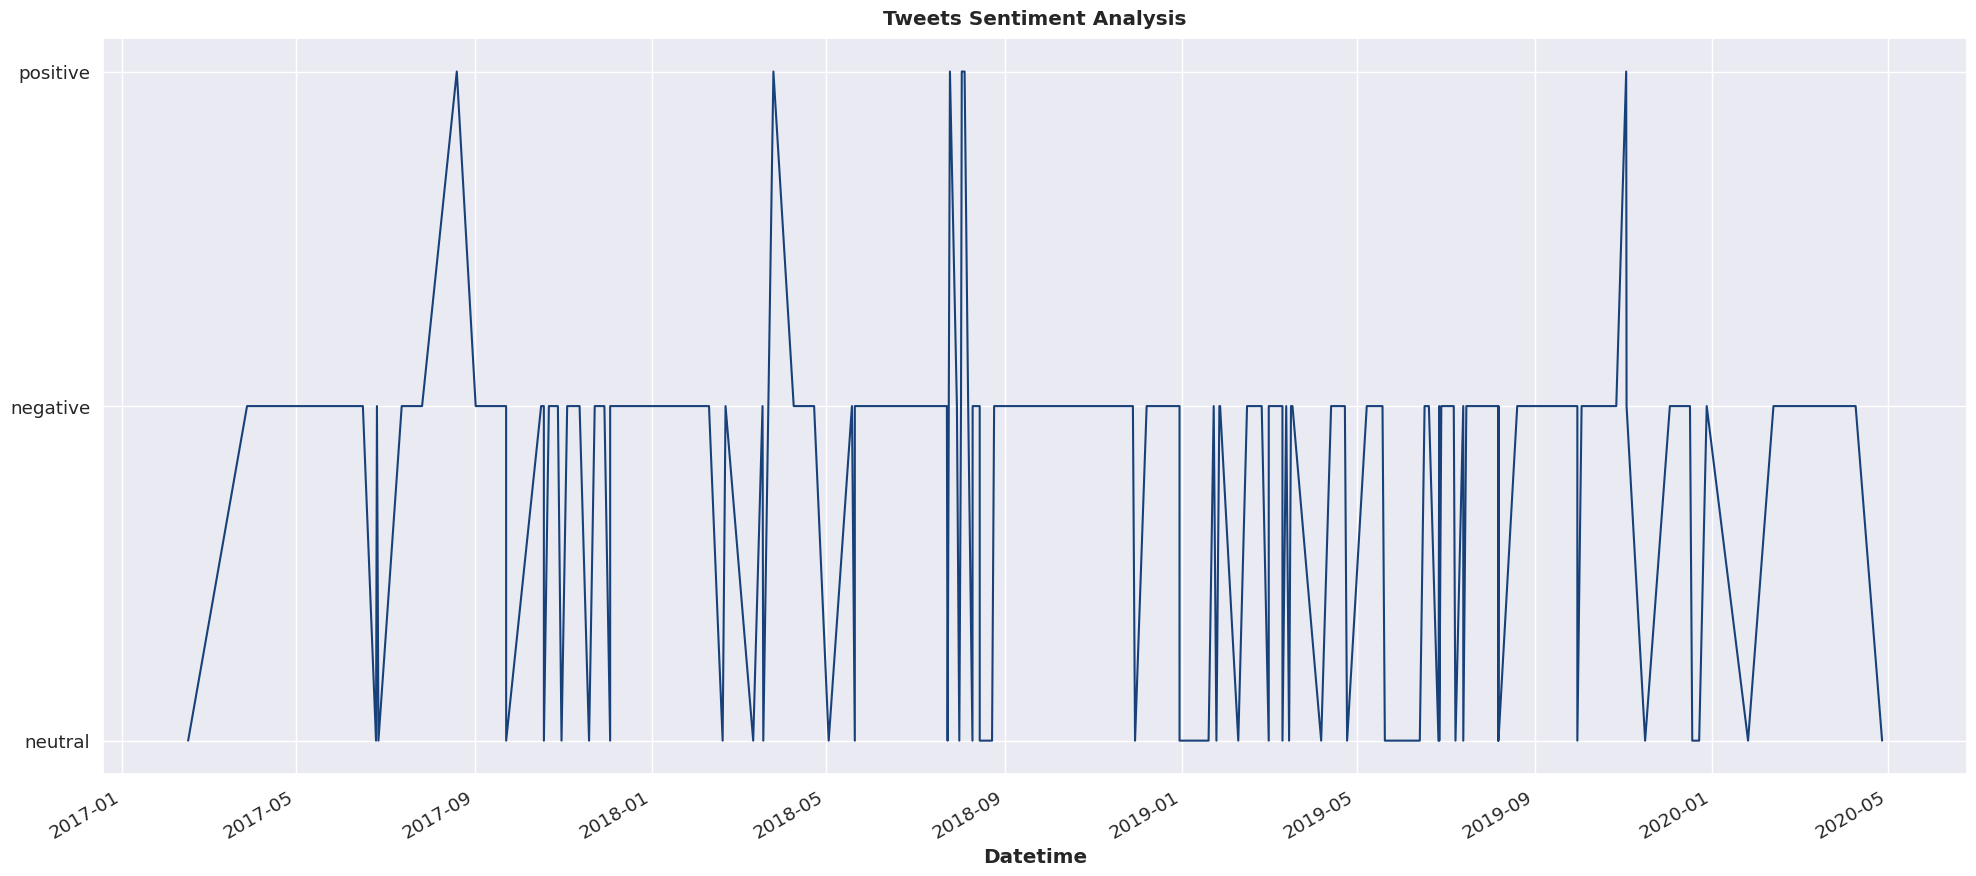

In [299]:
appended['label_index'].plot()
classes= ['positive', 'negative', 'neutral']

plt.yticks([2, 1, 0], classes)
plt.title('Tweets Sentiment Analysis')
plt.savefig(os.path.join(TIMESERIES_DATASET_DIR,'Tweets_Sentiment_Analysis'),format='png')
plt.show()

In [255]:
appended

,english_tweet,arabic_tweet,label,score,score_norm,label_index
Datetime,,,,,,
2017-02-15 12:08:12,This Russian connection nonsense is merely an attempt to coverup the many mistakes made in Hillary Clintons losing campaign,هذا الربط الروسي هذا الهراء هو مجرد محاولة للتموي على الأخطاء العديدة التي ارتكبت في حملة فقدان هيلاري كلينتونز,negative,0.999999,-0.999999,0
2017-03-28 01:26:04,Why isnt the House Intelligence Committee looking into the Bill amp Hillary deal that allowed big Uranium to go to Russia Russian speech,لماذا لا تنظر لجنة الاستخبارات في مجلس النواب النظر في صفقة مشروع القانون Amp هيلاري الذي سمح يورانيوم كبيرة للذهاب إلى خطاب روسيا الروسية,neutral,0.999999,0.000000,1
2017-03-28 01:35:35,money to Bill the Hillary Russian reset praise of Russia by Hillary or Podesta Russian Company Trump Russia story is a hoax MAGA,من قبل (هيلاري) أو (بوديستا) من شركة (ترامب روسيا) الروسية,neutral,0.999999,0.000000,1
2017-04-03 11:16:52,Was the brother of John Podesta paid big money to get the sanctions on Russia lifted Did Hillary know,(كان شقيق (جون بوديستا قد دفع مبلغاً كبيراً ليرفع العقوبات على روسيا هل كانت (هيلاري) تعلم,neutral,0.999999,0.000000,1
2017-04-03 11:21:11,Did Hillary Clinton ever apologize for receiving the answers to the debate Just asking,هل تعتذرت هيلاري كلينتون عن تلقي إجابات النقاش,neutral,0.999999,0.000000,1
...,...,...,...,...,...,...
2020-02-12 02:09:26,Whatever happened to Hillary campaign manager Podestas BROTHER Wasnt he caught forced to leave his firm with BIG BAD things to happen Why did nothing ever happen to him only to the other side,أياً كان ما حدث لمدير حملة (هيلاري) (بوديستاس) و (واست) الأخ الأخ (أُمِس وأُجبِرَ على ترك شركته مع أشياء (بي بي بي إي),neutral,0.999999,0.000000,1
2020-02-20 15:22:15,They say Roger Stone lied to Congress OH I see but so did Comey and he also leaked classified information for which almost everyone other than Crooked Hillary Clinton goes to jail for a long time and so did Andy McCabe who also lied to the FBI FAIRNESS,يقولون أنّ (روجر ستون) كذب على الكونغرس، أرى ذلك، لكنّ (كومي) أيضاً سرّب معلومات سريّة,neutral,0.999999,0.000000,1
2020-02-23 18:45:26,Are any Democrat operatives the DNC or Crooked Hillary Clinton blaming Russia Russia Russia for the Bernie Sanders win in Nevada If so I suggest calling Bob Mueller amp the Angry Democrats to do a new Mueller Report Democrat Edition Bob will get to the bottom of it,هل هناك أي ناشطين ديمقراطيين من DNC أو كروكد هيلاري كلينتون يلومون روسيا روسيا روسيا روسيا على فوز بيرني ساندرز في نيفادا إذا كان كذلك أقترح دعوة بوب مولر ام ام ام ام ام امبير الديمقراطيين الغاضبين,neutral,0.999999,0.000000,1


## Time Series Forecasting

In [271]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [272]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(appended['label_index'], WINDOW_SIZE)
print(X1.shape, y1.shape)

(213, 10, 1) (213,)


In [273]:
X_train1, y_train1 = X1[:int(len(X1)*0.8)], y1[:int(len(y1)*0.8)]
X_val1, y_val1 = X1[int(len(X1)*0.8):int(len(X1)*0.9)], y1[int(len(y1)*0.8):int(len(y1)*0.9)]
X_test1, y_test1 = X1[int(len(X1)*0.9):], y1[int(len(y1)*0.9):]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((170, 10, 1), (170,), (21, 10, 1), (21,), (22, 10, 1), (22,))

In [277]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(3, 'softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 17,443
Trainable params: 17,443
Non-trainable params: 0
_________________________________________________________________


In [278]:
cp1 = ModelCheckpoint(os.path.join(TIMESERIES_DATASET_DIR,'model/'), monitor='val_loss', save_best_only=True, verbose=1)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [289]:
model1.fit(X_train1,
           y_train1,
           validation_data=(X_val1, y_val1),
           epochs=50,
           callbacks=[cp1])

Epoch 1/50
1/6 [====>.........................] - ETA: 27s - loss: 0.3403 - root_mean_squared_error: 0.5833
Epoch 1: val_loss did not improve from 0.39683
6/6 [==============================] - 7s 284ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 2/50
1/6 [====>.........................] - ETA: 0s - loss: 0.3299 - root_mean_squared_error: 0.5743
Epoch 2: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 25ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 3/50
1/6 [====>.........................] - ETA: 0s - loss: 0.4757 - root_mean_squared_error: 0.6897
Epoch 3: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 21ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 4/50
1/6 [====>.........................] - ETA: 0s - lo

6/6 [==============================] - 4s 866ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 12/50
1/6 [====>.........................] - ETA: 0s - loss: 0.4132 - root_mean_squared_error: 0.6428
Epoch 12: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 15ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 13/50
1/6 [====>.........................] - ETA: 0s - loss: 0.3819 - root_mean_squared_error: 0.6180
Epoch 13: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 14ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 14/50
1/6 [====>.........................] - ETA: 0s - loss: 0.3611 - root_mean_squared_error: 0.6009
Epoch 14: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 10ms/step - los

6/6 [==============================] - 4s 839ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 31/50
1/6 [====>.........................] - ETA: 0s - loss: 0.4132 - root_mean_squared_error: 0.6428
Epoch 31: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 19ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 32/50
1/6 [====>.........................] - ETA: 0s - loss: 0.4757 - root_mean_squared_error: 0.6897
Epoch 32: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 16ms/step - loss: 0.4327 - root_mean_squared_error: 0.6578 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 33/50
1/6 [====>.........................] - ETA: 0s - loss: 0.4757 - root_mean_squared_error: 0.6897
Epoch 33: val_loss did not improve from 0.39683
6/6 [==============================] - 0s 15ms/step - los

In [290]:
import os
print(os.listdir('/content/drive/MyDrive/Bachelor/Sentiment/TIMESERIES/model/'))

['variables', 'assets', 'fingerprint.pb', 'saved_model.pb', 'keras_metadata.pb']


In [291]:
from tensorflow.keras.models import load_model
model1 = load_model(os.path.join(TIMESERIES_DATASET_DIR,'model'))

In [ ]:
train_predictions = model1.predict(X_train1)
train_predictions = np.argmax(train_predictions,axis=-1)

test_predictions = model1.predict(X_test1)
test_predictions = np.argmax(test_predictions,axis=-1)

eval_predictions = model1.predict(X_val1)
eval_predictions = np.argmax(eval_predictions,axis=-1)

train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Train Actuals':y_train1})

eval_results = pd.DataFrame(data={'Validation Predictions':eval_predictions, 'Validation Actuals':y_val1})


test_results = pd.DataFrame(data={'Test Predictions':test_predictions,'Test Actuals':y_test1})

train_results,test_results,eval_results

In [293]:
from sklearn.metrics import classification_report

# print classification report for train set
print('Train Set Classification Report:')
print(classification_report(y_train1, train_predictions))

# print classification report for test set
print('Test Set Classification Report:')
print(classification_report(y_test1, test_predictions))

# print classification report for validation set
print('Validation Set Classification Report:')
print(classification_report(y_val1, eval_predictions))

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.29      0.28        41
           1       0.79      0.56      0.66       124
           2       0.03      0.20      0.05         5

    accuracy                           0.49       170
   macro avg       0.36      0.35      0.33       170
weighted avg       0.64      0.49      0.55       170

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.70      0.44      0.54        16
           2       0.12      1.00      0.22         1

    accuracy                           0.41        22
   macro avg       0.36      0.55      0.33        22
weighted avg       0.57      0.41      0.45        22

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00   

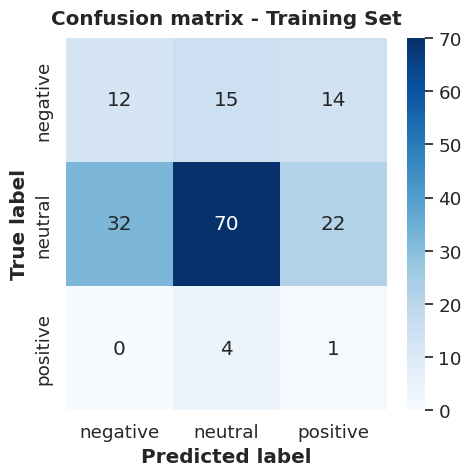

Accuracy: 0.49


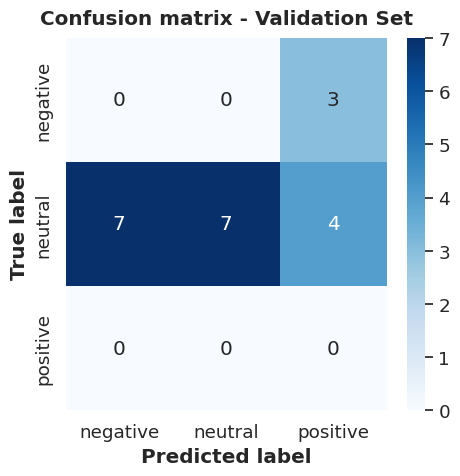

Accuracy: 0.33


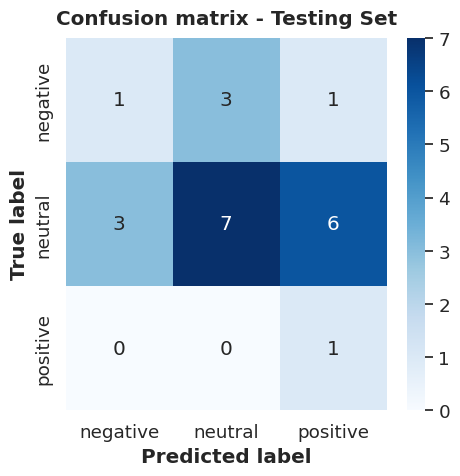

Accuracy: 0.41


In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
classes= ['negative', 'neutral','positive']

def calculate_accuracy_and_cm(y_true, y_pred, classes,name):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    title='Confusion matrix - '+name
    plt.title(title)
    plt.savefig(os.path.join(TIMESERIES_DATASET_DIR,title),format='png')
    plt.show()
    print(f'Accuracy: {accuracy:.2f}')

# Calculate accuracy and confusion matrix for training set
calculate_accuracy_and_cm(y_train1, train_predictions, classes ,name = 'Training Set')

# Calculate accuracy and confusion matrix for validation set
calculate_accuracy_and_cm(y_val1, eval_predictions, classes,name = 'Validation Set')

# Calculate accuracy and confusion matrix for test set
calculate_accuracy_and_cm(y_test1, test_predictions, classes,name = 'Testing Set')

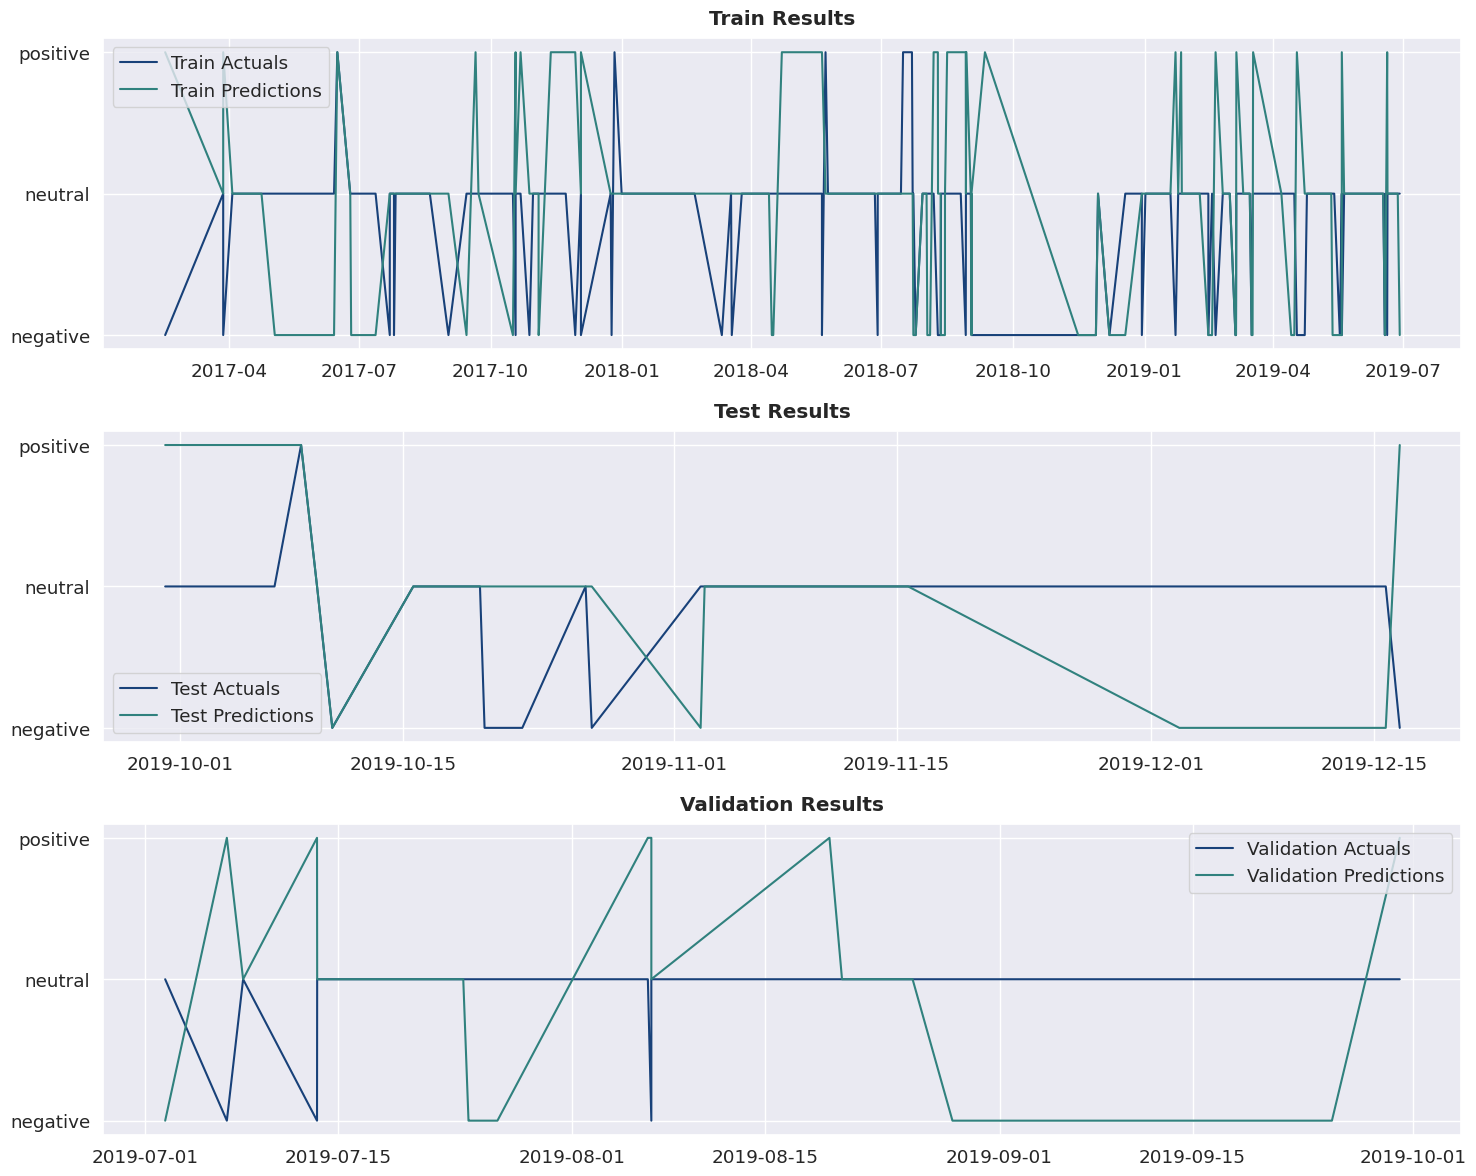

In [310]:
import matplotlib.pyplot as plt

train_results.index = appended.index[:len(train_results)]
eval_results.index = appended.index[len(train_results):(len(eval_results)+len(train_results))]


test_results.index = appended.index[(len(eval_results)+len(train_results)):(len(eval_results)+len(train_results)+len(test_results))]
# Plot the time series


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

ax1.plot(train_results.index, train_results['Train Actuals'], label='Train Actuals')
ax1.plot(train_results.index, train_results['Train Predictions'], label='Train Predictions')
ax1.set_title('Train Results')
ax1.legend()
plt.yticks([2, 1, 0], classes)
ax1.set_yticks([0, 1, 2])
ax1.set_yticklabels(classes)


ax2.plot(test_results.index, test_results['Test Actuals'], label='Test Actuals')
ax2.plot(test_results.index, test_results['Test Predictions'], label='Test Predictions')
ax2.set_title('Test Results')
ax2.legend()
plt.yticks([2, 1, 0], classes)
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(classes)


ax3.plot(eval_results.index, eval_results['Validation Actuals'], label='Validation Actuals')
ax3.plot(eval_results.index, eval_results['Validation Predictions'], label='Validation Predictions')
ax3.set_title('Validation Results')
ax3.legend()
ax3.set_yticks([0, 1, 2])
ax3.set_yticklabels(classes)
plt.savefig(os.path.join(TIMESERIES_DATASET_DIR,'results'),format='png') # Save train figure

plt.tight_layout()
plt.show()


# Tweepy failed

In [284]:
import configparser
# read configs
config=configparser.ConfigParser()
config.read(CONFIG_DIR)
# Add Twitter API key and secret

api_key =config['twitter']['api_key']
api_key_secret =config['twitter']['api_key_secret']
access_token =config['twitter']['access_token']
access_token_secret =config['twitter']['access_token_secret']


In [285]:
import tweepy
import time
 

 
# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break
 
# Define query parameters
query = "query"

# Search for tweets using TwitterAPI

# Search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search,
                       q=query,
                       tweet_mode='extended',
                       lang='en').items())

# Iterate over the search results
for item in search:
    # Process the tweet as desired
    print(item.full_text)

AttributeError: ignored

In [ ]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break
 
# Define the term you will be using for searching tweets
query = '@NotionHQ'
query = query + ' -filter:retweets'
 
# Define how many tweets to get from the Twitter API
count = 1000
 
# Search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search,
                       q=query,
                       tweet_mode='extended',
                       lang='en',
                       result_type="recent").items(count))
 
# Process the results from the search using Tweepy
tweets = []
for result in search:
    tweet_content = result.full_text
    tweets.append(tweet_content) # Only saving the tweet content.